<a href="https://colab.research.google.com/github/HunterVinic/Machine-Learning-with-Python/blob/main/K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
file_path = "/content/drive/MyDrive/datamining/Utilities.csv"
utilities_df = pd.read_csv(file_path)
utilities_df.head()

,Company,Fixed_charge,RoR,Cost,Load_factor,Demand_growth,Sales,Nuclear,Fuel_Cost
0,Arizona,1.06,9.2,151,54.4,1.6,9077,0.0,0.628
1,Boston,0.89,10.3,202,57.9,2.2,5088,25.3,1.555
2,Central,1.43,15.4,113,53.0,3.4,9212,0.0,1.058
3,Commonwealth,1.02,11.2,168,56.0,0.3,6423,34.3,0.700
4,NY,1.49,8.8,192,51.2,1.0,3300,15.6,2.044


In [4]:
X= utilities_df.iloc[:,[6,8]].values


array([[9.0770e+03, 6.2800e-01],
       [5.0880e+03, 1.5550e+00],
       [9.2120e+03, 1.0580e+00],
       [6.4230e+03, 7.0000e-01],
       [3.3000e+03, 2.0440e+00],
       [1.1127e+04, 1.2410e+00],
       [7.6420e+03, 1.6520e+00],
       [1.3082e+04, 3.0900e-01],
       [8.4060e+03, 8.6200e-01],
       [6.4550e+03, 6.2300e-01],
       [1.7441e+04, 7.6800e-01],
       [6.1540e+03, 1.8970e+00],
       [7.1790e+03, 5.2700e-01],
       [9.6730e+03, 5.8800e-01],
       [6.4680e+03, 1.4000e+00],
       [1.5991e+04, 6.2000e-01],
       [5.7140e+03, 1.9200e+00],
       [1.0140e+04, 1.1080e+00],
       [1.3507e+04, 6.3600e-01],
       [7.2870e+03, 7.0200e-01],
       [6.6500e+03, 2.1160e+00],
       [1.0093e+04, 1.3060e+00]])

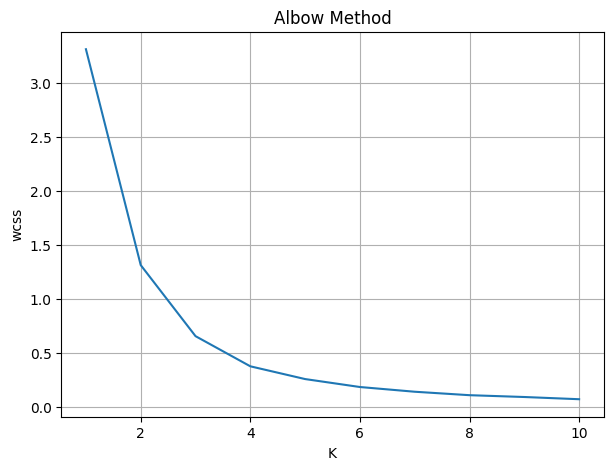

In [9]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
#Normalize the Data

X= scaler.fit_transform(X)

plt.figure(figsize = (7,5))
#WCSS = Within CLuster Sum of Square
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init ='k-means++', random_state = 42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('Albow Method')
plt.xlabel('K')
plt.ylabel('wcss')
plt.grid('True')
plt.show()

In [10]:
kmeans= KMeans(n_clusters = 3, init ='k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

[2 1 2 2 1 2 1 0 2 2 0 1 2 2 1 0 1 2 0 2 1 2]


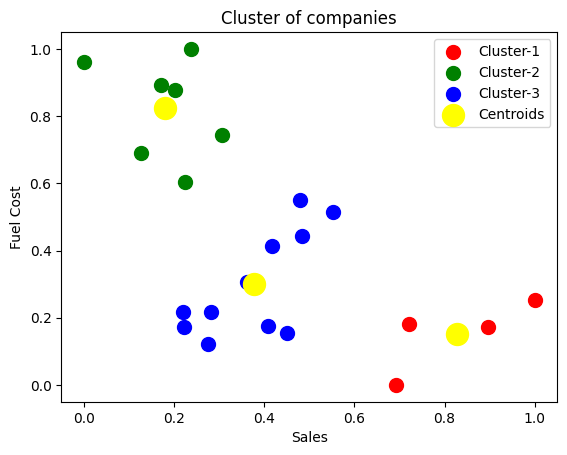

In [14]:
# Visualize the Clusters

plt.scatter(X[y_kmeans == 0,0],X[y_kmeans == 0,1], s = 100, c ='red', label ='Cluster-1')
plt.scatter(X[y_kmeans == 1,0],X[y_kmeans == 1,1], s = 100, c ='green', label ='Cluster-2')
plt.scatter(X[y_kmeans == 2,0],X[y_kmeans == 2,1], s = 100, c ='blue', label ='Cluster-3')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s= 250, c = 'yellow', label= 'Centroids')

plt.legend()
plt.title('Cluster of companies')
plt.xlabel('Sales')
plt.ylabel('Fuel Cost')
plt.show()

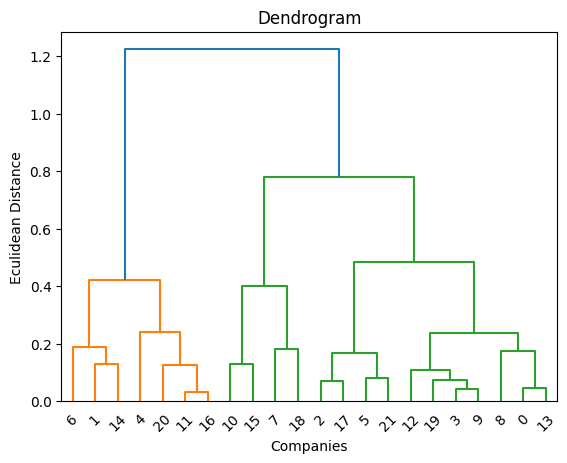

In [16]:
# Use Hierarchical Clustering
from scipy.cluster.hierarchy import dendrogram, linkage

dendrogram = dendrogram(linkage(X, method ='complete'))
plt.title('Dendrogram')
plt.xlabel('Companies')
plt.ylabel('Eculidean Distance')
plt.show()

In [18]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')

y_hc= hc.fit_predict(X)
print(y_hc)

[0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0]


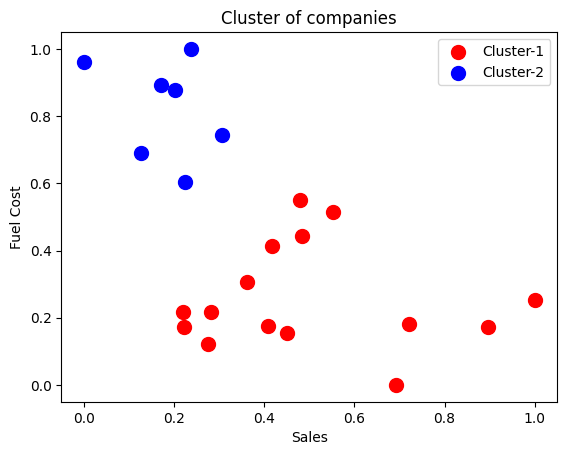

In [20]:
plt.scatter(X[y_hc == 0,0],X[y_hc == 0,1], s=100, c='red', label='Cluster-1')
plt.scatter(X[y_hc == 1,0],X[y_hc == 1,1], s=100, c='blue', label='Cluster-2')
plt.legend()
plt.title('Cluster of companies')
plt.xlabel('Sales')
plt.ylabel('Fuel Cost')
plt.show()

In [21]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')

y_hc= hc.fit_predict(X)
print(y_hc)

[0 1 0 0 1 0 1 2 0 0 2 1 0 0 1 2 1 0 2 0 1 0]


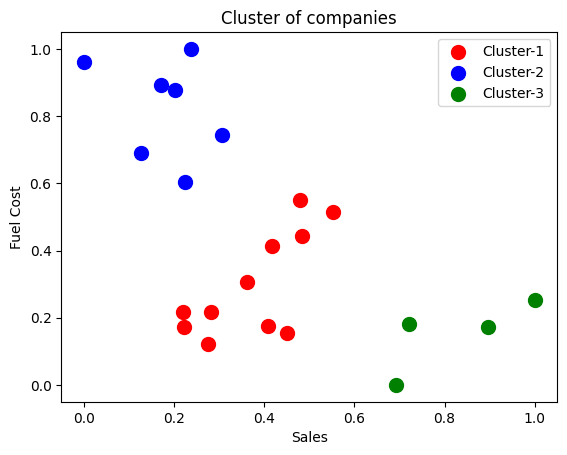

In [23]:
plt.scatter(X[y_hc == 0,0],X[y_hc == 0,1], s=100, c='red', label='Cluster-1')
plt.scatter(X[y_hc == 1,0],X[y_hc == 1,1], s=100, c='blue', label='Cluster-2')
plt.scatter(X[y_hc == 2,0],X[y_hc == 2,1], s=100, c='green', label='Cluster-3')
plt.legend()
plt.title('Cluster of companies')
plt.xlabel('Sales')
plt.ylabel('Fuel Cost')
plt.show()